<a href="https://colab.research.google.com/github/Dhanushreeb310/NLP/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!



--- Splitting: 70% training | 30% testing ---
              precision    recall  f1-score   support

         neg       0.80      0.83      0.82       302
         pos       0.82      0.79      0.81       298

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600


--- Splitting: 50% training | 50% testing ---
              precision    recall  f1-score   support

         neg       0.80      0.81      0.81       507
         pos       0.80      0.80      0.80       493

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000


--- Splitting: 90% training | 10% testing ---
              precision    recall  f1-score   support

         neg       0.78      0.86      0.82        99
         pos       0.85      0.76      0.80       101

    accuracy                           0.

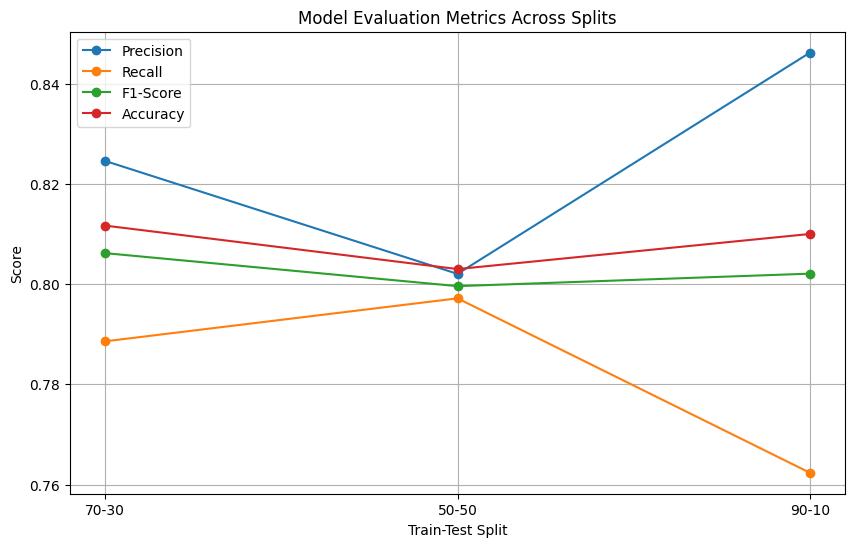

In [2]:
# Import libraries
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Download dataset
nltk.download('movie_reviews')

# Load dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Split into features (text) and labels (sentiment)
texts = [" ".join(doc) for doc, label in documents]
labels = [label for doc, label in documents]

# Function for vectorization, training, and graph plotting
def train_evaluate_and_plot(test_sizes):
    results = {'Split': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Accuracy': []}

    for test_size in test_sizes:
        print(f"\n--- Splitting: {100 - int(test_size * 100)}% training | {int(test_size * 100)}% testing ---")

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            texts, labels, test_size=test_size, random_state=42
        )

        # Vectorize text data
        vectorizer = CountVectorizer()
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        # Train Naive Bayes model
        model = MultinomialNB()
        model.fit(X_train_vec, y_train)

        # Evaluate model
        y_pred = model.predict(X_test_vec)
        precision = precision_score(y_test, y_pred, pos_label="pos", average="binary")
        recall = recall_score(y_test, y_pred, pos_label="pos", average="binary")
        f1 = f1_score(y_test, y_pred, pos_label="pos", average="binary")
        accuracy = accuracy_score(y_test, y_pred)

        # Save results for graph
        results['Split'].append(f"{int((1 - test_size) * 100)}-{int(test_size * 100)}")
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['Accuracy'].append(accuracy)

        # Print classification report
        print(classification_report(y_test, y_pred))

    # Plot results
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    x = range(len(test_sizes))

    plt.figure(figsize=(10, 6))
    for metric in metrics:
        plt.plot(x, results[metric], marker='o', label=metric)

    plt.xticks(x, results['Split'])
    plt.xlabel('Train-Test Split')
    plt.ylabel('Score')
    plt.title('Model Evaluation Metrics Across Splits')
    plt.legend()
    plt.grid()
    plt.show()

# Perform sentiment analysis with different train-test splits and plot results
splits = [0.3, 0.5, 0.1]  # Test sizes for 70-30, 50-50, and 90-10
train_evaluate_and_plot(splits)
